# Deber Map of Science 
Nombre: Johanna Guarango

Para el ejercicio se consideraron datos del virus del ébola

In [9]:
import re
import csv

In [10]:
with open('../deber/data/pubmed_ebolavirus_set.txt',encoding= 'utf-8') as f:
    my_data = f.read()

In [11]:
len(my_data)

20968487

In [12]:
my_data = re.sub(r'\n\s{6}', ' ', my_data)
paises= re.findall (r"\,\s[A-zA-Z]{2,13}\.", my_data)
print(paises)


[', Uganda.', ', USA.', ', USA.', ', USA.', ', USA.', ', Canada.', ', Liberia.', ', USA.', ', USA.', ', Poland.', ', Australia.', ', USA.', ', UK.', ', UK.', ', UK.', ', USA.', ', USA.', ', USA.', ', USA.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Italy.', ', Poland.', ', Germany.', ', USA.', ', Germany.', ', Germany.', ', Germany.', ', Germany.', ', Japan.', ', Japan.', ', Germany.', ', Germany.', ', UK.', ', Italy.', ', Italy.', ', Italy.', ', UK.', ', UK.', ', Canada.', ', Canada.', ', Canada.', ', Italy.', ', UK.', ', UK.', ', UK.', ', UK.', ', UK.', ', USA.', ', USA.', ', USA.', ', USA.', ', Zimbabwe.', ', Uni.', ', France.', ', Mozambique.', ', Zimbabwe.', ', Uni.', ', France.', ', Uni.', ', France.', ', France.', ', France.', ', France.', ', Uni.', ', France.', ', France.', ', France.', ', Uni.', ', France.', ', France.', ', Belgium.', ', USA.', ', USA.', ', USA.', ', USA.', ', USA.', ', Ltd.', ', USA.', ', USA.', ', USA.', ', USA.', ', USA.', ', Turkey.', 

In [13]:
print(my_data[:3500])

PMID- 32080199
OWN - NLM
STAT- MEDLINE
DCOM- 20210202
LR  - 20210219
IS  - 2056-676X (Electronic)
IS  - 2056-676X (Linking)
VI  - 6
IP  - 1
DP  - 2020 Feb 20
TI  - Ebola virus disease.
PG  - 13
LID - 10.1038/s41572-020-0147-3 [doi]
LID - 13
AB  - Ebola virus disease (EVD) is a severe and frequently lethal disease caused by Ebola  virus (EBOV). EVD outbreaks typically start from a single case of probable zoonotic  transmission, followed by human-to-human transmission via direct contact or contact  with infected bodily fluids or contaminated fomites. EVD has a high case-fatality  rate; it is characterized by fever, gastrointestinal signs and multiple organ  dysfunction syndrome. Diagnosis requires a combination of case definition and  laboratory tests, typically real-time reverse transcription PCR to detect viral RNA  or rapid diagnostic tests based on immunoassays to detect EBOV antigens. Recent  advances in medical countermeasure research resulted in the recent approval of an  EBOV-tar

Now write a regular expression that creates a list of zipcodes:

In [14]:
zipcodes = re.findall(r'[A-Z]{2}\s(\d{5}), ', my_data)

In [15]:
len(zipcodes)

3380

In [16]:
zipcodes[:10]

['59840',
 '59840',
 '59840',
 '21702',
 '21702',
 '98402',
 '21702',
 '21702',
 '21702',
 '21702']

In [17]:
unique_zipcodes = list(set(zipcodes))

In [18]:
unique_zipcodes.sort()

In [19]:
unique_zipcodes[:10]

['01267',
 '01439',
 '01605',
 '01655',
 '01915',
 '02109',
 '02111',
 '02114',
 '02115',
 '02116']

In [20]:
len(unique_zipcodes)

302

Now create a dictionary with the latitude and longitude for each zipcode:

In [21]:
zip_coordinates = {}
with open('../deber/data/zipcodes_coordinates.txt') as f:
    csvr = csv.DictReader(f)
    for row in csvr:
        zip_coordinates[row['ZIP']] = [float(row['LAT']), 
                                       float(row['LNG'])]

### Create the lists `zip_code`, containing the ZIP codes, `zip_long`, `zip_lat`, and `zip_count`, containing the unique ZIP codes, their longitude, latitude, and count (number of occurrences in Science), respectively.

In [22]:
zip_code = []
zip_long = []
zip_lat = []
zip_count = []

Populate the lists:

In [23]:
for z in unique_zipcodes:
    # if we can find the coordinates
    if z in zip_coordinates.keys():
        zip_code.append(z)
        zip_lat.append(zip_coordinates[z][0])
        zip_long.append(zip_coordinates[z][1])
        zip_count.append(zipcodes.count(z))

### Plot the results using the following code:

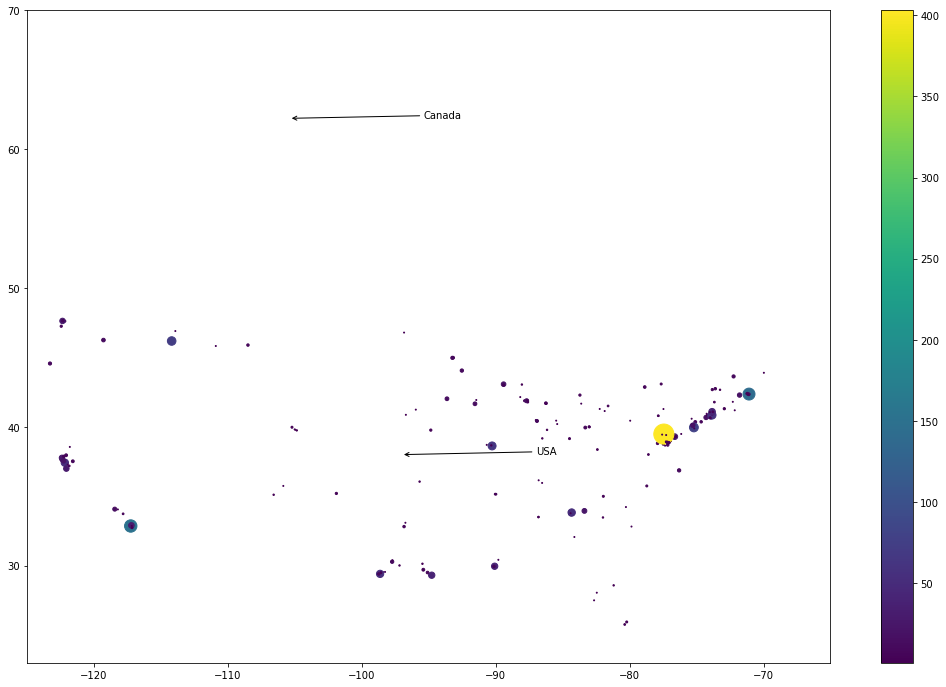

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zip_long, zip_lat, s = zip_count, c= zip_count)
plt.colorbar()
# only continental us without Alaska
plt.xlim(-125,-65)
plt.ylim(23, 70)
# add a few cities for reference (optional)
ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-97, 38), 
               xytext = (-87, 38), arrowprops = ard)
plt.annotate('Canada', xy = (-105.38, 62.23), 
               xytext = (-95.38, 62.23), arrowprops= ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show()

In [29]:
zip_code.index('60637')

171

In [30]:
zip_count[215]

3